# Case Study

BACKGROUND:

In [5]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.proportion as ssp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
import warnings
warnings.filterwarnings("ignore")
import os
os.chdir(r"C:\Users\willi\OneDrive\Documents\Woolf Institute Data Analytics\Module 4 Advanced Predictive Modelling\04_ Live Class Data Sets")

In [3]:
# Import Data
ICU_data = pd.read_csv("ICU Mortality.csv")
print("✅ Dataset Loaded Successfully")
print(ICU_data.info())
print(ICU_data.describe())

✅ Dataset Loaded Successfully
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SR NO   200 non-null    int64
 1   ID      200 non-null    int64
 2   STA     200 non-null    int64
 3   AGE     200 non-null    int64
 4   SEX     200 non-null    int64
 5   RACE    200 non-null    int64
 6   SER     200 non-null    int64
 7   CAN     200 non-null    int64
 8   CRN     200 non-null    int64
 9   INF     200 non-null    int64
 10  CPR     200 non-null    int64
 11  SYS     200 non-null    int64
 12  HRA     200 non-null    int64
 13  PRE     200 non-null    int64
 14  TYP     200 non-null    int64
 15  FRA     200 non-null    int64
 16  PO2     200 non-null    int64
 17  PH      200 non-null    int64
 18  PCO     200 non-null    int64
 19  BIC     200 non-null    int64
 20  CRE     200 non-null    int64
 21  LOC     200 non-null    int64
dtypes: int64(22)
memory 

In [6]:
# Rename INF columns
ICU_data.rename(columns={'INF' : 'INF_C'}, inplace=True)
ICU_data.head(5)

,SR NO,ID,STA,AGE,SEX,RACE,SER,CAN,CRN,INF_C,...,HRA,PRE,TYP,FRA,PO2,PH,PCO,BIC,CRE,LOC
0,1,8,0,27,1,1,0,0,0,1,...,88,0,1,0,0,0,0,0,0,0
1,2,12,0,59,0,1,0,0,0,0,...,80,1,1,0,0,0,0,0,0,0
2,3,14,0,77,0,1,1,0,0,0,...,70,0,0,0,0,0,0,0,0,0
3,4,28,0,54,0,1,0,0,0,1,...,103,0,1,1,0,0,0,0,0,0
4,5,32,0,87,1,1,1,0,0,1,...,154,1,1,0,0,0,0,0,0,0


In [9]:
# Vital Status Statistics

VF_Stat = ICU_data.copy()
VF_Stat['STA'].replace({0: 'Lived', 1: 'Dead'}, inplace=True)
#To get the count
count = VF_Stat['STA'].value_counts().reset_index()
count.columns = ['Vital Status', 'Count']  # Rename the value column to 'Count'
#To get percentage count
per = VF_Stat['STA'].value_counts(normalize = True).reset_index()
per.columns = ['Vital Status', 'Proportion'] # Rename the value column to 'Proportion'
VF_Stat = pd.merge(count, per, on=['Vital Status']) # Merge on the common 'Vital Status' column
VF_Stat['Proportion'] = VF_Stat['Proportion'] * 100

print(VF_Stat)

  Vital Status  Count  Proportion
0        Lived    160        80.0
1         Dead     40        20.0


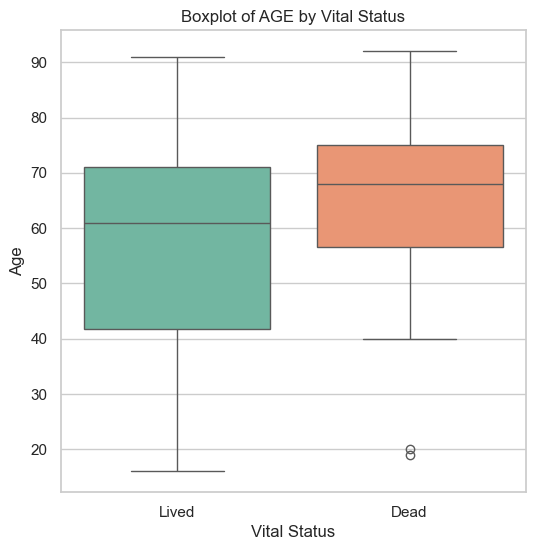

In [14]:
# DATA VISUALIZATION

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='STA', y='AGE', data=ICU_data, palette="Set2")
plt.xticks([0, 1], ['Lived', 'Dead'])  # Set x-ticks to show 'Lived' and 'Dead'
plt.title('Boxplot of AGE by Vital Status')
plt.xlabel('Vital Status')
plt.ylabel('Age')
plt.show()

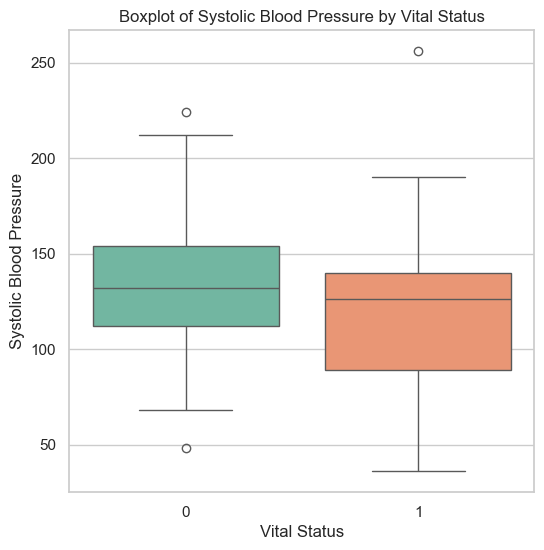

In [18]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='STA', y='SYS', data=ICU_data, palette="Set2")
plt.title('Boxplot of Systolic Blood Pressure by Vital Status')
plt.xlabel('Vital Status')
plt.ylabel('Systolic Blood Pressure')
plt.show()

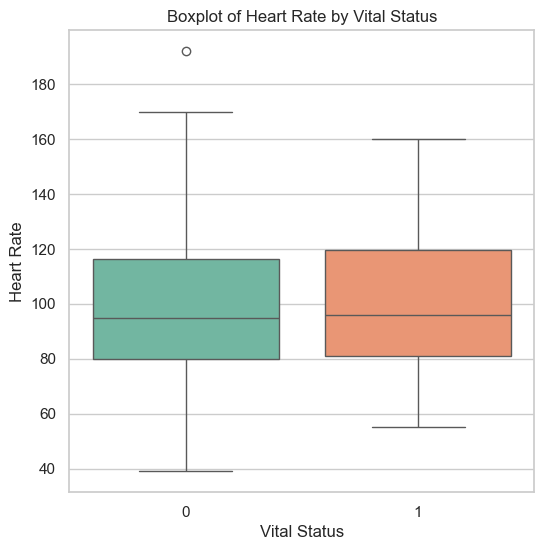

In [20]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='STA', y='HRA', data=ICU_data, palette="Set2")
plt.title('Boxplot of Heart Rate by Vital Status')
plt.xlabel('Vital Status')
plt.ylabel('Heart Rate')
plt.show()

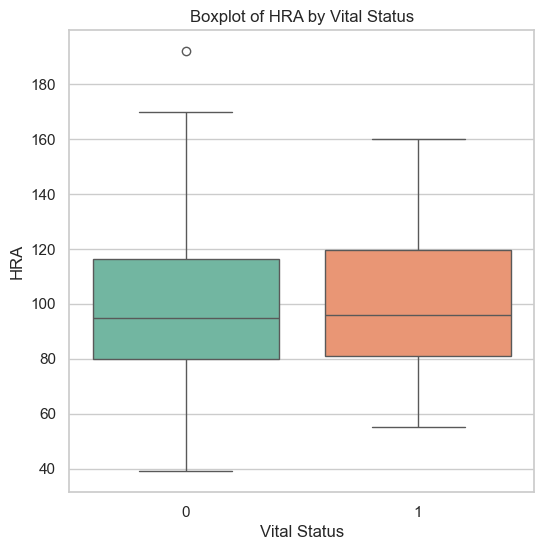

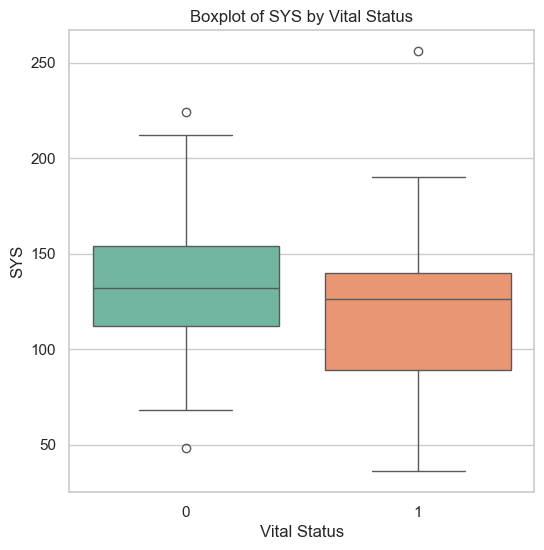

In [21]:
lst = ['HRA','SYS']

for var in lst:
    sns.set(style="whitegrid")
    # Create a boxplot using Seaborn
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='STA', y=var, data=ICU_data, palette="Set2")
    plt.title(f'Boxplot of {var} by Vital Status')
    plt.xlabel('Vital Status')
    plt.ylabel(var)
    plt.show()

In [ ]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot using Seaborn
plt.figure(figsize=(6, 6))
sns.boxplot(x='STA', y='HRA', data=ICU_data, palette="Set2")
plt.title('Boxplot of Heart Rate by Vital Status')
plt.xlabel('Vital Status')
plt.ylabel('Heart Rate')
plt.show()

In [22]:
# Group the data by SEX and calculate the count of STA for each group
SEX_df = ICU_data.copy()
SEX_df['SEX'].replace({0: 'Male', 1: 'Female'}, inplace=True)

grouped_sex = SEX_df.groupby('SEX')['STA'].agg(['count', 'sum']).reset_index()

# Rename the columns for clarity
grouped_sex.columns = ['SEX', 'Total Count', 'Death Count']

# Calculate the death rate as a percentage
grouped_sex['Death Rate(%)'] = (grouped_sex['Death Count'] / grouped_sex['Total Count']) * 100
grouped_sex.round(2)

,SEX,Total Count,Death Count,Death Rate(%)
0,Female,76,16,21.05
1,Male,124,24,19.35


In [23]:
ADM_df = ICU_data.copy()
ADM_df['TYP'].replace({0: 'Elective', 1: 'Emergency'}, inplace=True)

# Group the data by SEX and calculate the count of STA for each group
grouped_typ = ADM_df.groupby('TYP')['STA'].agg(['count', 'sum']).reset_index()

# Rename the columns for clarity
grouped_typ.columns = ['TYP', 'Total Count', 'Death Count']

# Calculate the death rate as a percentage
grouped_typ['Death Rate(%)'] = (grouped_typ['Death Count'] / grouped_typ['Total Count']) * 100
grouped_typ.round(2)

,TYP,Total Count,Death Count,Death Rate(%)
0,Elective,53,2,3.77
1,Emergency,147,38,25.85


In [24]:
# Level Of Consciousness (LOC) - Based Mortality Statistics

LOC_df = ICU_data.copy()
LOC_df['LOC'].replace({0: 'No Coma Or Stupor', 1: 'Deep Stupor', 2: 'Coma'}, inplace=True)

# Group the data by SEX and calculate the count of STA for each group
grouped_loc = LOC_df.groupby('LOC')['STA'].agg(['count', 'sum']).reset_index()

# Rename the columns for clarity
grouped_loc.columns = ['LOC', 'Total Count', 'Death Count']

# Calculate the death rate as a percentage
grouped_loc['Death Rate(%)'] = (grouped_loc['Death Count'] / grouped_loc['Total Count']) * 100
grouped_loc.round(2)

,LOC,Total Count,Death Count,Death Rate(%)
0,Coma,10,8,80.00
1,Deep Stupor,5,5,100.00
2,No Coma Or Stupor,185,27,14.59


Observations :
Level of consciousness at admission is clearly associated with ICU mortality. The mortality rate being highest for Deep Stupor followed by Coma and No Coma or Stupor

In [25]:
# Logistic Regression Model

ICU_data["LOC"] = np.where(ICU_data["LOC"]>0, 1, 0)

In [27]:
# Step 1: Define your formula
formula = 'STA ~ AGE + SEX + SER + CAN + CRN  + INF_C + CPR + SYS + HRA + PRE + TYP + FRA + PO2 + PH + PCO + BIC + CRE + LOC'

# Step 2: Fit the linear regression model
model = smf.logit(formula, data=ICU_data).fit()

# Step 3: Print the model summary
print("BLR ModelSummary:\n",model.summary())

         Current function value: 0.325995
         Iterations: 35
BLR ModelSummary:
                            Logit Regression Results                           
Dep. Variable:                    STA   No. Observations:                  200
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                           18
Date:                Sat, 03 May 2025   Pseudo R-squ.:                  0.3485
Time:                        10:04:45   Log-Likelihood:                -65.199
converged:                      False   LL-Null:                       -100.08
Covariance Type:            nonrobust   LLR p-value:                 4.957e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7910      1.858     -2.040      0.041      -7.434      -0.148
AGE            0.0437      0.016      2.735   

Observations :
The variables AGE(patient's age ), LOC(level of consciousness), TYP(type of admission) and PCO (PCO2 from initial blood gases) are statistically significant (p <= 0.05) risk factors associated with ICU mortality. Further, the variable SYS (Systolic Blood Pressure) and PH (PH from initial blood gases) is statistically significant at 10% level of significance (p=0.07 and 0.057)

NOTE:
While our model includes several variables that are statistically insignificant, it is crucial to emphasize that in the healthcare domain, caution should be exercised when considering variable removal. In healthcare, even seemingly insignificant variables may hold clinical relevance or contribute to a comprehensive understanding of patient outcomes. Therefore, retaining these variables in the model allows for a more holistic analysis that aligns with the complex and multifaceted nature of healthcare data

In [28]:
# Variance Inflation Factor (VIF) Analysis (checking Multicollinearity)

# Create a DataFrame to store VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = model.model.exog_names[1:]  # Exclude intercept
vif_data["VIF"] = [variance_inflation_factor(model.model.exog, i) for i in range(1, model.model.exog.shape[1])]

# Print the VIF DataFrame
print(vif_data)

   Feature       VIF
0      AGE  1.347618
1      SEX  1.096121
2      SER  1.927416
3      CAN  1.375821
4      CRN  1.319146
5    INF_C  1.332957
6      CPR  1.315199
7      SYS  1.171510
8      HRA  1.294332
9      PRE  1.167468
10     TYP  1.892265
11     FRA  1.259913
12     PO2  1.404664
13      PH  1.622939
14     PCO  1.744181
15     BIC  1.382282
16     CRE  1.260468
17     LOC  1.246863


Observations :
It is observed that no variable has high vif. Hence the problem of multicollinearity does not exist

AUC ROC: 0.85609375


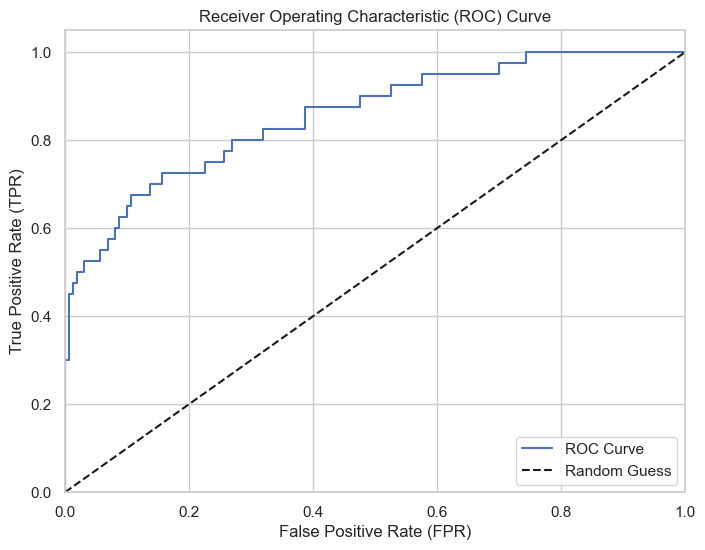

In [31]:
# Evaluate Model Performance by Checking Area Under The ROC Curve

ICU_data['predicted_prob'] = model.predict(ICU_data)
# Step 1: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(ICU_data['STA'], ICU_data['predicted_prob'])

# Step 2: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Step 3: Calculate AUC ROC
auc_roc = roc_auc_score(ICU_data['STA'], ICU_data['predicted_prob'])
print(f'AUC ROC: {auc_roc}')

# Step 4: Show the plot
plt.show()

In [32]:
# Finding the best Theshold.

# Calculate Receiver Operating Characteristic (ROC) curve values.
fpr, tpr, thresholds = roc_curve(ICU_data['STA'], ICU_data['predicted_prob'])
# Find the optimal threshold index that maximizes the difference between true positive rate (tpr) and false positive rate (fpr).
optimal_idx = np.argmax(tpr - fpr)

# Get the corresponding optimal threshold from the thresholds array.
optimal_threshold = round(thresholds[optimal_idx],3)

# Convert the optimal_threshold to a percentage string before printing
print(f'Best Threshold is : {optimal_threshold}')

Best Threshold is : 0.28


In [33]:
# Classification report

# Calculate predicted classes (usually a threshold of 0.5 is used for binary classification)
ICU_data['predicted_class'] = (ICU_data['predicted_prob'] > optimal_threshold).astype(int)

# Create the classification report
report = classification_report(ICU_data['STA'], ICU_data['predicted_class'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.60      0.65      0.63        40

    accuracy                           0.84       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.85      0.84      0.85       200



Observations :¶
The sensitivity and specificity values using optimum threshold are approximately 65% and 89% and the accuracy is approximately 84% indicating good model performance.